<a href="https://colab.research.google.com/github/UN-GCPDS/Curso-Corto-LLMs/blob/main/3.%20Dashboard/Agentes_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Packages:


In [ ]:
!pip install langchain-experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
!pip install langchain-openai
!pip install --force-reinstall -v httpx==0.27.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.75
    Uninstalling langchain-core-0.3.75:
      Successfully uninstalled langchain-core-0.3.75
Using pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)
  Obtaining dependency information for httpx==0.27.2 from https://files.pythonhosted.org/packages/56/95/9377bcb415797e44274b51d46e3249eba641711cf3348050f76ee7b15ffc/httpx-0.27.2-py3-none-any.whl.metadata
  Obtaining dependency information for anyio from https://files.pythonhosted.org/packages/6f/12/e5e0282d673bb9746bacfb6e2dba8719989d3660cdb2ea79aee9a9651afb/anyio-4.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for certifi from https://files.pythonhosted.org/packages/e5/48/1549795ba7742c948d2ad169c1c8cdbae65bc450d6cd753d124b17c8cd32/certifi-2025.8.3

In [ ]:
import pandas as pd
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import OpenAI
from langchain_community.chat_models import ChatOpenAI
import os

##Agentes inteligentes:

**Un agente inteligente es basicamente un modelo de lenguaje que tiene la capacidad de entender el entorno que lo rodea y deacuerdo a este entendimiento comenzar a tomar decisiones (Incluso ejecutar acciones sobre nuestra computadorta)**

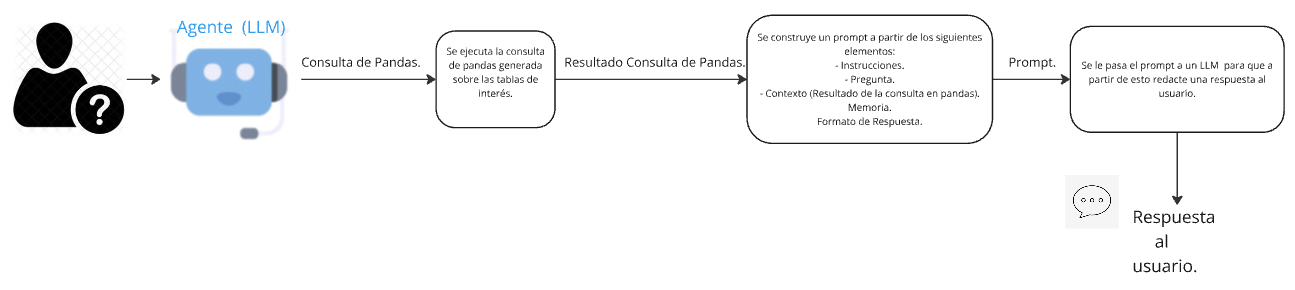

In [ ]:
eventos_df=pd.read_pickle("/content/Eventos_transformador.pkl")
eventos_df

,evento,equipo_ope,tipo_equi_ope,cto_equi_ope,tipo_elemento,inicio,fin,duracion_h,tipo_duracion,causa,...,TIPO_SUB,FECHA,GRUPO015,FECHA_ACT,KVA,KV1,LONGITUD,LATITUD,DEP,MUN
0,7549915,O23523,transformador,BOA23L12,TFD,2019-01-01 06:50:15,2019-01-01 09:10:31,2.337778,> 3 min,Causa desconocida,...,Subestaciones de distribución tipo poste,2019-01,32.0,2017-07,5.0,7.621,-75.948880,4.945180,RISARALDA,BALBOA
1,7549924,L13557,transformador,DON23L13,TFD,2019-01-01 00:00:01,2019-01-01 11:25:00,11.416389,> 3 min,Falla activo nivel 1 propiedad particular,...,Subestaciones de distribución tipo poste,2019-01,33.0,2005-10,5.0,13.200,-74.837784,5.478122,CALDAS,VICTORIA
2,7549940,W10256,transformador,BUM23L12,TFD,2019-01-01 10:19:13,2019-01-01 12:18:01,1.980000,> 3 min,Causa desconocida,...,Subestaciones de distribución tipo poste,2019-01,32.0,2004-09,15.0,7.621,-75.847935,5.196622,RISARALDA,BELÉN DE UMBRÍA
3,7549966,W55768,transformador,RIO23L14,TFD,2019-01-01 09:19:47,2019-01-01 12:50:16,3.508056,> 3 min,Árbol o rama sobre redes del SDL,...,Subestaciones de distribución tipo poste,2019-01,33.0,2017-12,25.0,7.621,-75.691988,5.486376,CALDAS,RIOSUCIO
4,7549968,O23660,transformador,BOA23L12,TFD,2019-01-01 11:35:25,2019-01-01 11:52:25,0.283333,> 3 min,Mantenimiento preventivo sobre las redes,...,Subestaciones de distribución tipo poste,2019-01,32.0,1899-12,10.0,7.621,-75.921015,4.964977,RISARALDA,SANTUARIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,8272912,E12352,transformador,VCT23L13,TFD,2024-06-30 09:36:04,2024-06-30 17:00:54,7.413889,> 3 min,Falla en transformador de distribución o sus e...,...,Subestaciones de distribución tipo poste,2024-06,33.0,2023-02,10.0,7.621,-74.950447,5.270715,CALDAS,VICTORIA
68201,8272914,L11309,transformador,DON23L14,TFD,2024-06-30 13:30:11,2024-06-30 17:30:28,4.004722,> 3 min,Falla en postes y/o crucetas en el SDL,...,Subestaciones de distribución tipo poste,2024-06,33.0,2015-01,10.0,13.200,-74.844042,5.464336,CALDAS,VICTORIA
68202,8272918,D14083,transformador,ROS23L19,TFD,2024-06-30 14:57:50,2024-06-30 17:20:50,2.383333,> 3 min,Condiciones atmosféricas,...,Subestaciones de distribución tipo poste,2024-06,33.0,2015-01,37.5,13.200,-75.694873,4.874553,RISARALDA,DOSQUEBRADAS
68203,8272932,N10075,transformador,NRA23L12,TFD,2024-06-30 17:38:13,2024-06-30 18:37:27,0.987222,> 3 min,Causa desconocida,...,Subestaciones de distribución tipo poste,2024-06,22.0,2009-08,30.0,13.200,-75.518050,5.165072,CALDAS,NEIRA


In [ ]:
from getpass import getpass #Para ingresar la API KEY de OPEN AI
import os #Para cargar la API en las variables de entorno de la máquina

OPENAI_API_KEY = getpass('Enter the secret value: ')
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

Enter the secret value: ··········


##Contextualizando al Agente Inteligente A partir de Ejemplos de la Data:

In [ ]:
agent = create_pandas_dataframe_agent(
        ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
        eventos_df,
        verbose=True,
        agent_type="openai-functions",#prefix=descripcion_df,  # Añade la descripción al inicio del prompt #suffix=suffix_instrucciones.format(path_plot=path_plot),
        allow_dangerous_code=True,
        include_df_in_prompt=True,  # Incluye las primeras filas del DataFrame en el prompt
        number_of_head_rows=5)

query="Cuantas interrupciones han habido en cada año. Respondeme siempre en español."
response=agent.invoke(query)["output"]

/tmp/ipython-input-3702983797.py:2: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['FECHA'] = pd.to_datetime(df['FECHA'])\ninterrupciones_por_anio = df['FECHA'].dt.year.value_counts()\ninterrupciones_por_anio"}`


NameError: name 'pd' is not defined
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\n\ndf['FECHA'] = pd.to_datetime(df['FECHA'])\ninterrupciones_por_anio = df['FECHA'].dt.year.value_counts()\ninterrupciones_por_anio"}`
responded: Parece que olvidé importar la librería pandas. Permíteme corregirlo.

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead
Invoking: `python_repl_ast` with `{'query': "df['FECHA'] = pd.to_datetime(df['FECHA'], format='%Y-%m')\ninterrupciones_por_anio = df['FECHA'].dt.year.value_counts()\ninterrupciones_por_anio"}`
responded: Parece que hay un error al intentar contar las interrupciones por año. Permíteme corregirlo.

TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead
I

In [ ]:
response

'En cada año, el número de interrupciones ha sido el siguiente:\n- 2019: 11,963 interrupciones\n- 2020: 9,102 interrupciones\n- 2021: 12,737 interrupciones\n- 2022: 12,494 interrupciones\n- 2023: 15,418 interrupciones\n- 2024: 6,491 interrupciones'

#Contextualizando al Agente Inteligente apartir de la Descripción de la Data:

In [ ]:
eventos_df.columns

Index(['evento', 'equipo_ope', 'tipo_equi_ope', 'cto_equi_ope',
       'tipo_elemento', 'inicio', 'fin', 'duracion_h', 'tipo_duracion',
       'causa', 'CNT_TRAFOS_AFEC', 'cnt_usus', 'SAIDI', 'SAIFI', 'PHASES',
       'FPARENT', 'OWNER1', 'TRFTYPE', 'ELNODE', 'IMPEDANCE', 'DATE_FAB',
       'MARCA', 'TIPO_SUB', 'FECHA', 'GRUPO015', 'FECHA_ACT', 'KVA', 'KV1',
       'LONGITUD', 'LATITUD', 'DEP', 'MUN'],
      dtype='object')

In [ ]:
head_df = eventos_df.head(5).to_string(index=False)

descripcion_df="""
Este DataFrame contiene información acerca de interrupciones o eventos presentadas en redes eléctricas de media tensión,
más específicamente en tres tipos de equipos: Tranformadores, interruptores y tramos de linea (tramos de red).

Las columnas incluyen:
- **Evento**: Id de la interrupción o el evento.
- **equipo_ope**: Código del equipo en el que ocurrió la interrupción.
- **tipo_equi_ope**: Me indica si la interrupción ocurrió sobre un Transformador, o sobre un interruptor o sobre un tramo de linea, es decir que tiene solo tres posibles valores.
- **cto_equi_ope**: Código del circuito al que pertenece el equipo en el cual se dió la interrupción.
- **tipo_elemento**: Capacidad en Kilo Voltios del equipo en el cual ocurrió la interrupción, tiene 4 posibles valores: 33, 13.2, TFD y TFP
- **inicio**: Fecha y hora del inicio del evento o interrupción.
- **fin**: Fecha y hora de la finalización del evento o interrupción.
- **duracion_h**: Duración en horas del evento o interrupción.
- **tipo_duracion**: Variable categórica que indica si ele vento duró más de tres minutos o no; por tanto, tiene dos posibles valores: > 3 min y <= 3 min
- **causa**: Causa del evento o interrupción.
- **CNT_TRAFOS_AFEC**: Cantidad de transformadores afectados en la interrupción o evento.
- **cnt_usus**: Cantidad de usuarios afectados por la interrupción o evento.
- **SAIDI**: Indicador que mide el promedio de la duración en horas de la interrupción por usuario.
- **SAIFI**: Indicador que mide el promedio de cantidad de interrupciones por usuario.
- **PHASES**: Número de fases del equipo en el que ocurrió la interrupción; por tanto tiene 3 posibles valores: 3., 1., 2.
- **FPARENT**: Código del circuito que contiene el equipo en donde se presentó la interrupción.
- **FECHA**: Fecha en la que se presentó el evento o interrupción.
- **LONGITUD**: Longitud geográfica de la ubicación del equipo en el que se presentó la interrupción o evento.
- **LATITUD**: Latiud geográfica de la ubicación del equipo en el que se presentó la interrupción o evento.
- **DEP**: Departamento en donde se presentó la interrupción o evento.
- **MUN**: Municipio en donde se presentó la interrupción o evento.
"""

agent = create_pandas_dataframe_agent(
        ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
        eventos_df,
        verbose=True,
        agent_type="openai-functions",
        prefix=descripcion_df,  # Añade la descripción al inicio del prompt #suffix=suffix_instrucciones.format(path_plot=path_plot),
        allow_dangerous_code=True)

query="Cuantas interrupciones son superiores a 2 horas por cada año. Respondeme siempre en español."
response=agent.invoke(query)["output"]



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['inicio'] = pd.to_datetime(df['inicio'])\ninterrupciones_superiores_2h_por_anio = df[df['duracion_h'] > 2].groupby(df['inicio'].dt.year)['evento'].count()\ninterrupciones_superiores_2h_por_anio"}`


NameError: name 'pd' is not defined
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\ninterrupciones_superiores_2h_por_anio = df[df['duracion_h'] > 2].groupby(df['inicio'].dt.year)['evento'].count()\ninterrupciones_superiores_2h_por_anio"}`
responded: Se produjo un error al intentar ejecutar la consulta. Permíteme intentarlo de nuevo.

inicio
2019    7379
2020    5999
2021    8479
2022    7936
2023    8701
2024    3728
Name: evento, dtype: int64El número de interrupciones superiores a 2 horas por año son:
- En 2019: 7379 interrupciones
- En 2020: 5999 interrupciones
- En 2021: 8479 interrupciones
- En 2022: 7936 interrupciones
- En 2023: 8701 interrupciones
- En 2024: 3728 interrupciones

In [ ]:
response

'El número de interrupciones superiores a 2 horas por año son:\n- En 2019: 7379 interrupciones\n- En 2020: 5999 interrupciones\n- En 2021: 8479 interrupciones\n- En 2022: 7936 interrupciones\n- En 2023: 8701 interrupciones\n- En 2024: 3728 interrupciones'

#Generando Gráficos apartir del Agente Inteligente:



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport pandas as pd\n\n# Agrupar el dataframe por departamento y contar la cantidad de interrupciones\ninterrupciones_por_departamento = df.groupby('MUN')['evento'].count()\n\n# Crear el gráfico\nplt.figure(figsize=(12, 6))\n\n# Colores personalizados\ncolors = ['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#9E9E9E', '#607D8B', '#455A64']\n\ninterrupciones_por_departamento.sort_values().plot(kind='barh', color=colors)\nplt.title('Cantidad de Interrupciones por Departamento', fontsize=16)\nplt.xlabel('Cantidad de Interrupciones', fontsize=12)\nplt.ylabel('Departamento', fontsize=12)\nplt.grid(axis='x', linestyle='--', alpha=0.6)\nplt.tight_layout()\nplt.savefig('/content/image.jpg')"}`


El gráfico que muestra la cantidad de interrupciones por departamento ha sido creado y guardado en la ruta relativa `/content/image.jpg`.

> Finished chain.


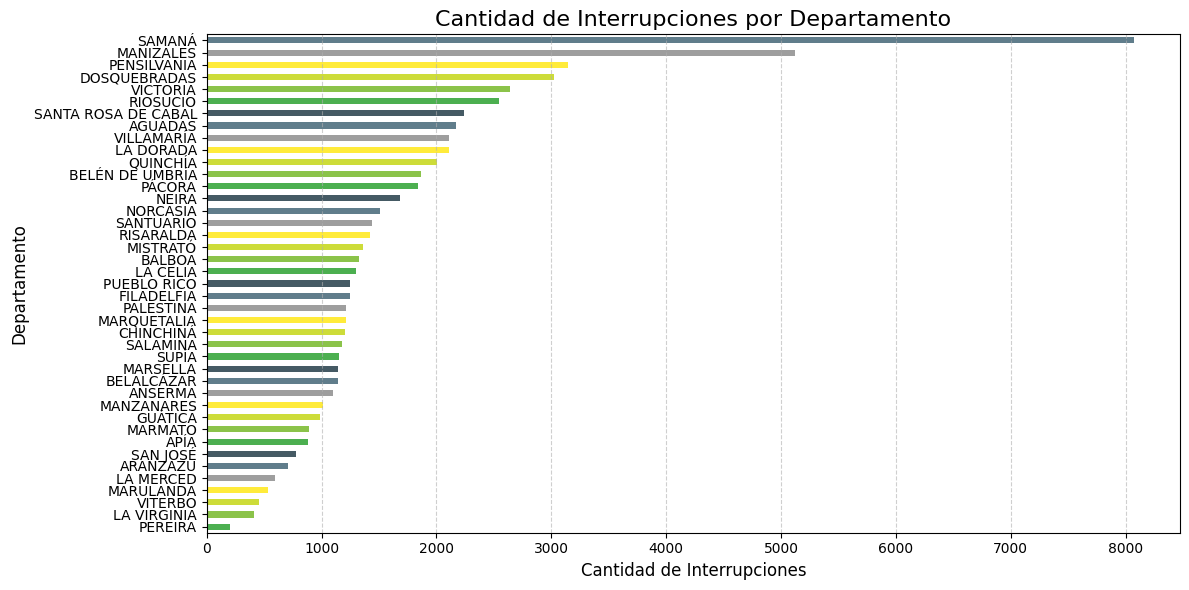

In [ ]:
query="Construye un gráfico en el cual muestres la cantidad de interrupciones por cada departamento"
path_plot="/content/image.jpg"
prompt=f"""{query}. Construye el gráfico de la forma más estética posible para mostrar a un usuario.
    Puedes utilizar los siguientes colores: verde y gris en diferentes tonalidades (si es necesario, utiliza más colores).
    Además, los títulos y ejes de los gráficos deben estar en español.
    Guarda la imagen en la ruta relativa {path_plot}.
    No ejecutes el comando plt.show().
    Siempre ejecuta el comando plt.tight_layout()."""

agent = create_pandas_dataframe_agent(
        ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
        eventos_df,
        verbose=True,
        agent_type="openai-functions",#prefix=descripcion_df,  # Añade la descripción al inicio del prompt #suffix=suffix_instrucciones.format(path_plot=path_plot),
        allow_dangerous_code=True,
        include_df_in_prompt=True,  # Incluye las primeras filas del DataFrame en el prompt
        number_of_head_rows=5)

response=agent.invoke(prompt)["output"]

In [ ]:
response